In [9]:

from io import StringIO
import requests
import json
import pandas as pd

df = pd.read_csv('data.csv')
#df.head()


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

df['Time'] = pd.to_datetime(df['Time'])
df.index = df['Time']
del df['Time']
#df.head()

In [11]:
df_Jan=df['2015-01-01':'2015-12-01']
#df_Jan.plot(y='Apartment2', figsize=(20,5))
df_Jan=df_Jan.resample('D', how='mean')

C:\Users\12bee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df_Jan['date'] = df_Jan.index
df_Jan['date'] = pd.to_datetime(df_Jan['date'])
#df_Jan.head()

In [13]:
import numpy as np

X=(df_Jan['date'] - df_Jan['date'][0]).dt.days
y = (df_Jan['Apartment2'].values)*1000
z = (df_Jan['Apartment4'].values)*1000

#X = df_Jan.values[:,0:2]
#y = df_Jan.values[:,12]*1000



X=X.reshape(-1,1)
y=y.flatten()
z=z.flatten()

C:\Users\12bee\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


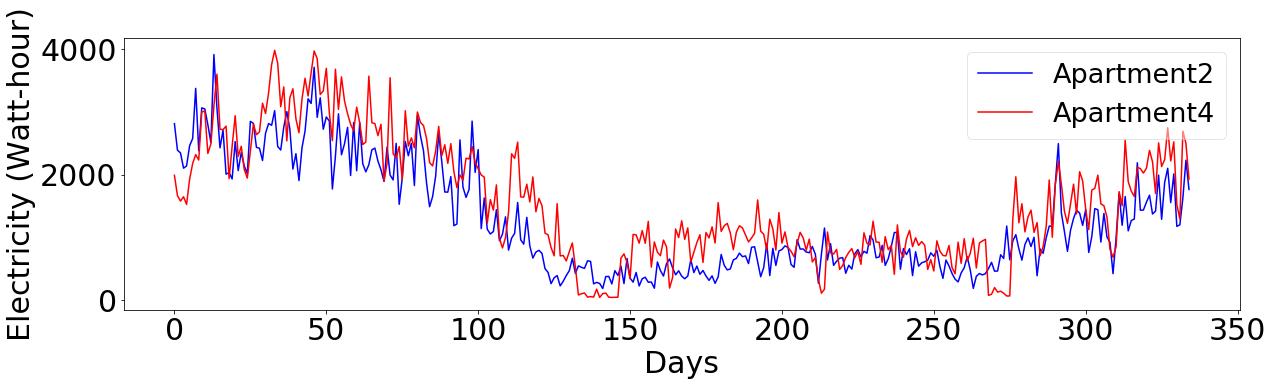

In [14]:
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 30})
plt.plot(X,y,'b', label='Apartment2')
plt.plot(X,z,'r', label='Apartment4')
plt.ylabel('Electricity (Watt-hour)', fontsize=30)
plt.xlabel('Days', fontsize=30)
plt.legend(loc='upper right', fontsize=27,framealpha=0.5)
plt.savefig('1a.pdf', bbox_inches='tight')
plt.show()